## Time series in Pandas
- 우리가 만지는 대부분의 데이터는 시계열 데이터  
`시간에 특화된 기능이 필요`  
ex) 데이터 중 주말 통계만 필요  
- Time lag(ex : 특정 2개의 time 사이의 차이) or Moving Average는 계산  
Pandas에는 이에 특화된 기능을 제공

### DateTimeIndex
- 파이썬은 날짜 데이터 처리를 위해 datetime 모듈을 활용

In [3]:
from datetime import datetime
# 'Month-Day-Year' : string type
date_str = '09-19-2018'
# string type -> time type
date_object = datetime.strptime(date_str, '%m-%d-%Y').date()
print(type(date_object))
print(date_object)

<class 'datetime.date'>
2018-09-19


```
date_str = '09/19/2018'
date_object = datetime.strptime(date_str, '%m/%d/%Y').date()
```

In [2]:
date_object.day

19

In [3]:
date_object.month

9

In [5]:
date_object.year

2018

In [7]:
# 요일을 의미
date_object.weekday()

2

> date_str_1과 2의 차이를 알고 싶은 경우

In [8]:
date_str_1 = '180919'
date_str_2 = '180925'
date_object_1 = datetime.strptime(date_str_1, '%y%m%d').date()
date_object_2 = datetime.strptime(date_str_2, '%y%m%d').date()
date_object_2 - date_object_1

datetime.timedelta(days=6)

In [11]:
datetime_str = '09/19/18 13:55:26'
datetime_obj = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_obj))
print(datetime_obj)

<class 'datetime.datetime'>
2018-09-19 13:55:26


### DateTime Index 만들기
- 대부분의 데이터는 str임
=> 호출 후 DateTime Index로 변환 필요
```
df['datetime']=pd.to_datetime(df['date'])
```


In [ ]:
# .T : 전치(행열바꿈), 1번째 행부터 보여라, reset_index : index 정리 
pd.read_csv("filename", encoding="cp949",sep="\t").T[1:].reset_index()
# data column name change, str이면 "", int면 "" 필요 X
df.rename(columns={"기존name":"바꿀name"})
# .을 기준으로 str type인 date를 나눠라 
df["date"].str.split(".")


def rename_date(X):
    return "-".join(x[:2]) # x 리스트의 1번째 열까지만 "-"로 합침  

# 만약 공백이 있을 경우에는
def rename_date(X):
    return "-".join([value.strip() for value in x[:2]])

# df["date"] 정리해주기, date type 변경
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')

# float type으로 변경 => .astype()
df["수치"].astype(float)
df = df.set_index("date")

pd.crosstab(df.index, df["지표"], df["수치"], aggfunc=sum)

## Resampling
### Time resampling
- 시간 기준으로 data Aggregation
- groupby와 유사
-> 훨씬 간단하고 다양한 기능 제공

In [2]:
import pandas as pd
import os

```
df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"), parse_dates = ["datetime"])
# inplace = True ; 다시 저장하지 않아도 됨
df.set_index("datetime", inplace = True)
df.head()
```

In [4]:
# 파일과 dir을 join
DATA_DIR = "bike_demand"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")

In [5]:
df = pd.read_csv(TRAIN_PATH)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


> 그냥 데이터를 불러오게 되면

In [7]:
df.dtypes
# datetime이 object로 인식

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

> datetime을 datetime type으로 인식하게 하기

In [8]:
df = pd.read_csv(TRAIN_PATH, parse_dates=["datetime"])
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### Groupby

In [9]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [10]:
df = df.set_index("datetime")
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [11]:
df["month"] = df.index.month
df["year"] = df.index.year
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,2012
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,2012
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,2012


In [12]:
df.head(2).T

datetime,2011-01-01 00:00:00,2011-01-01 01:00:00
season,1.000,1.000
holiday,0.000,0.000
workingday,0.000,0.000
weather,1.000,1.000
temp,9.840,9.020
atemp,14.395,13.635
humidity,81.000,80.000
windspeed,0.000,0.000
casual,3.000,8.000
registered,13.000,32.000


> 월별로 얼마나 자전거를 빌렸는가

In [13]:
df.groupby(["year","month"])["count"].sum()

year  month
2011  1         23552
      2         32844
      3         38735
      4         50517
      5         79713
      6         89776
      7         92848
      8         83296
      9         79104
      10        79522
      11        70889
      12        61183
2012  1         56332
      2         66269
      3         94766
      4        116885
      5        120434
      6        130957
      7        121769
      8        130220
      9        133425
      10       127912
      11       105551
      12        98977
Name: count, dtype: int64

In [14]:
# dataframe shape
df.groupby(["year","month"])["count"].sum().reset_index()

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


- groupby보다 더 쉬운거 ; resampling

> Q ; 분기별  
D ; day 하루  
W ; week 주  
M ; month 달

<AxesSubplot:xlabel='datetime'>

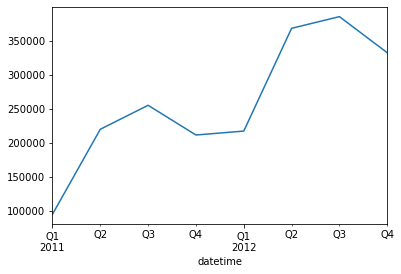

In [15]:
df["count"].resample("Q").sum().plot()

<AxesSubplot:xlabel='datetime'>

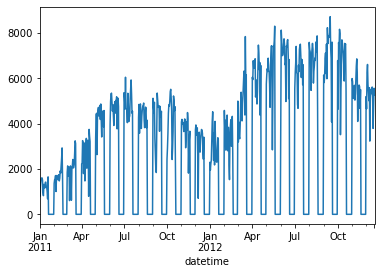

In [16]:
df["count"].resample("D").sum().plot()

<AxesSubplot:xlabel='datetime'>

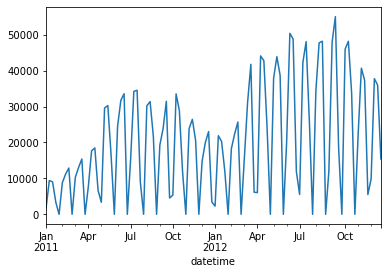

In [17]:
df["count"].resample("W").sum().plot()

<AxesSubplot:xlabel='datetime'>

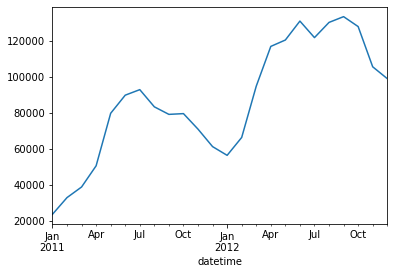

In [18]:
df["count"].resample("M").sum().plot()

### Resampling - Filter
- something_range 함수로 기간 생성 : filter 지정
```
# 월별 data ; period에 저장
period = pd.date_range(start='2011-01-01', end = '2011-05-31', freq = 'M')
df["count"].resample('M').sum()[period]
```
- DatetimeIndex
- timedelta_range
- period_range
- interval_range

In [19]:
# 월별 data ; period에 저장
period = pd.date_range(start='2011-01-01', end = '2012-01-31', freq = 'M')
df["count"].resample('M').sum()[period]

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
2012-01-31    56332
Freq: M, Name: count, dtype: int64

> start or end 없어도 가능 ! periods 이용 

In [20]:
period = pd.date_range(start='2011-01-01', periods = 12, freq = 'M')
df["count"].resample('M').sum()[period]

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
Freq: M, Name: count, dtype: int64

In [21]:
period = pd.date_range(start='2011-01-01', periods = 12, freq = 'M')
df["count"].resample('M').sum()['2011-01-01':'2012-01-31']

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
2012-01-31    56332
Freq: M, Name: count, dtype: int64

> 요일별 자전거의 수요량

<AxesSubplot:xlabel='dayofweek'>

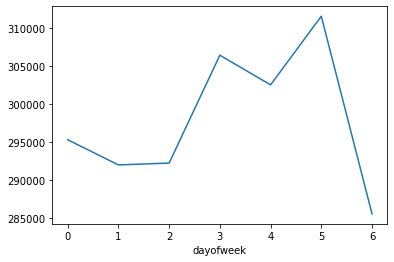

In [22]:
df["dayofweek"] = df.index.dayofweek
df.groupby("dayofweek")["count"].sum().plot()

## Time shifiting
- 시간의 차(time lag)분석 필요  
ex) 30일 전에 비해 주가는 상승세인가?
- pandas 내 Time shifting 기능으로   
time window(frequency랑 비슷)를 기준으로 기간 간 차이 분석

In [23]:
monthly_avg=df["count"].resample("M").mean()
# 2달 차이로 보기
monthly_avg.shift(periods=2,fill_value=0)

datetime
2011-01-31      0.000000
2011-02-28      0.000000
2011-03-31     54.645012
2011-04-30     73.641256
2011-05-31     86.849776
2011-06-30    111.026374
2011-07-31    174.809211
2011-08-31    196.877193
2011-09-30    203.614035
2011-10-31    182.666667
2011-11-30    174.622517
2011-12-31    174.773626
2012-01-31    155.458333
2012-02-29    134.173246
2012-03-31    124.353201
2012-04-30    145.646154
2012-05-31    208.276923
2012-06-30    257.455947
2012-07-31    264.109649
2012-08-31    287.186404
2012-09-30    267.037281
2012-10-31    285.570175
2012-11-30    292.598684
2012-12-31    280.508772
Freq: M, Name: count, dtype: float64

In [24]:
monthly_avg=df["count"].resample("M").mean()
# 2달 차이로 보기
monthly_avg
result = []
# 초기 데이터 넣어주기
result.append(monthly_avg)
for period in range(1,6):
    result.append(monthly_avg.shift(periods=period,fill_value=0))

In [25]:
result

[datetime
 2011-01-31     54.645012
 2011-02-28     73.641256
 2011-03-31     86.849776
 2011-04-30    111.026374
 2011-05-31    174.809211
 2011-06-30    196.877193
 2011-07-31    203.614035
 2011-08-31    182.666667
 2011-09-30    174.622517
 2011-10-31    174.773626
 2011-11-30    155.458333
 2011-12-31    134.173246
 2012-01-31    124.353201
 2012-02-29    145.646154
 2012-03-31    208.276923
 2012-04-30    257.455947
 2012-05-31    264.109649
 2012-06-30    287.186404
 2012-07-31    267.037281
 2012-08-31    285.570175
 2012-09-30    292.598684
 2012-10-31    280.508772
 2012-11-30    231.980220
 2012-12-31    217.054825
 Freq: M, Name: count, dtype: float64,
 datetime
 2011-01-31      0.000000
 2011-02-28     54.645012
 2011-03-31     73.641256
 2011-04-30     86.849776
 2011-05-31    111.026374
 2011-06-30    174.809211
 2011-07-31    196.877193
 2011-08-31    203.614035
 2011-09-30    182.666667
 2011-10-31    174.622517
 2011-11-30    174.773626
 2011-12-31    155.458333
 2012

In [26]:
pd.concat(result,axis=1)

,count,count,count,count,count,count
datetime,,,,,,
2011-01-31,54.645012,0.000000,0.000000,0.000000,0.000000,0.000000
2011-02-28,73.641256,54.645012,0.000000,0.000000,0.000000,0.000000
2011-03-31,86.849776,73.641256,54.645012,0.000000,0.000000,0.000000
2011-04-30,111.026374,86.849776,73.641256,54.645012,0.000000,0.000000
2011-05-31,174.809211,111.026374,86.849776,73.641256,54.645012,0.000000
2011-06-30,196.877193,174.809211,111.026374,86.849776,73.641256,54.645012
2011-07-31,203.614035,196.877193,174.809211,111.026374,86.849776,73.641256
2011-08-31,182.666667,203.614035,196.877193,174.809211,111.026374,86.849776
2011-09-30,174.622517,182.666667,203.614035,196.877193,174.809211,111.026374


### Moving average
- 시계열 데이터는 노이즈 발생  
=> 노이즈를 줄이면서 추세보기, 이동평균

In [27]:
day_avg = df["count"].resample("D").mean().fillna(0)
day_avg

datetime
2011-01-01     41.041667
2011-01-02     34.826087
2011-01-03     61.318182
2011-01-04     67.913043
2011-01-05     69.565217
                 ...    
2012-12-15    210.291667
2012-12-16    157.750000
2012-12-17    191.041667
2012-12-18    231.541667
2012-12-19    219.458333
Freq: D, Name: count, Length: 719, dtype: float64

> 빈 곳 발생 

<AxesSubplot:xlabel='datetime'>

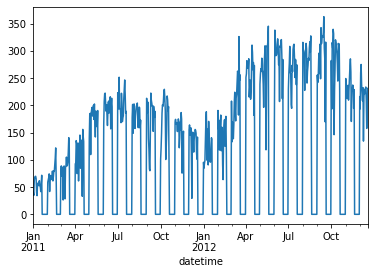

In [28]:
day_avg.plot()

> 빈곳 발생하므로 rolling

In [29]:
day_avg.rolling(window=30).mean().fillna(0)

datetime
2011-01-01      0.000000
2011-01-02      0.000000
2011-01-03      0.000000
2011-01-04      0.000000
2011-01-05      0.000000
                 ...    
2012-12-15    140.662500
2012-12-16    138.006944
2012-12-17    136.556944
2012-12-18    137.790278
2012-12-19    137.468056
Freq: D, Name: count, Length: 719, dtype: float64

<AxesSubplot:xlabel='datetime'>

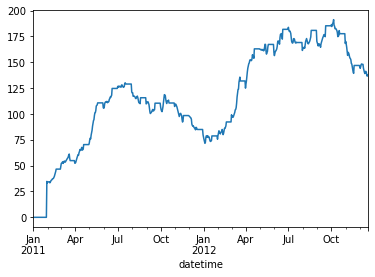

In [30]:
day_avg.rolling(window=30).mean().fillna(0).plot()

> 두개 plot 합치기

<AxesSubplot:xlabel='datetime'>

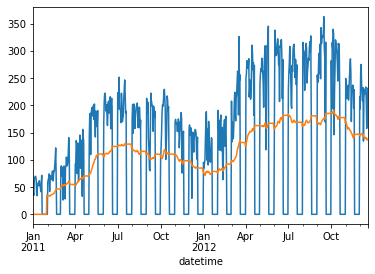

In [31]:
day_avg = df["count"].resample("D").mean().fillna(0)
day_avg.plot()
day_avg.rolling(window=30).mean().fillna(0).plot()

### Cumsum
- 시계열 데이터를 window마다 합침
- rolling(window=10).sum()과 다름

> 월별로 그대로 합해짐

In [32]:
df["count"].resample("M").mean().cumsum()

datetime
2011-01-31      54.645012
2011-02-28     128.286267
2011-03-31     215.136043
2011-04-30     326.162417
2011-05-31     500.971627
2011-06-30     697.848820
2011-07-31     901.462855
2011-08-31    1084.129522
2011-09-30    1258.752038
2011-10-31    1433.525665
2011-11-30    1588.983998
2011-12-31    1723.157244
2012-01-31    1847.510445
2012-02-29    1993.156598
2012-03-31    2201.433522
2012-04-30    2458.889469
2012-05-31    2722.999118
2012-06-30    3010.185521
2012-07-31    3277.222802
2012-08-31    3562.792977
2012-09-30    3855.391662
2012-10-31    4135.900434
2012-11-30    4367.880653
2012-12-31    4584.935478
Freq: M, Name: count, dtype: float64

> 서로의 range가 다르기 때문에 한쪽이 너무 커짐

<AxesSubplot:xlabel='datetime'>

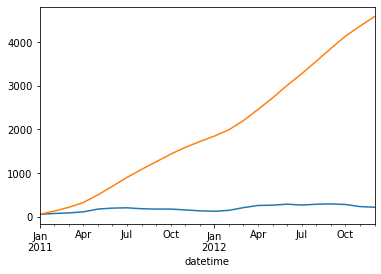

In [33]:
monthly_avg = df["count"].resample("M").mean()
cumsum_avg=df["count"].resample("M").mean().cumsum()
monthly_avg.plot()
cumsum_avg.plot()

<AxesSubplot:>

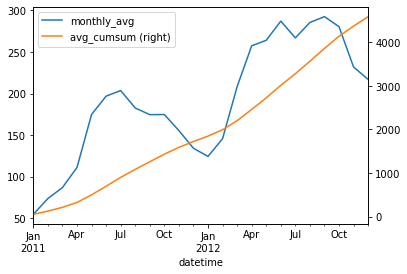

In [34]:
monthly_avg = df["count"].resample("M").mean()
cumsum_avg=df["count"].resample("M").mean().cumsum()
monthly_avg = monthly_avg.rename("monthly_avg")
cumsum_avg = cumsum_avg.rename("avg_cumsum")
df_monthly = pd.concat([monthly_avg,cumsum_avg],axis=1)
ax = df_monthly.plot(y="monthly_avg", use_index = True)
df_monthly.plot(y="avg_cumsum",secondary_y=True,ax=ax,use_index = True)